# CLR Callback

In [1]:
from clr_callback import *
from keras.optimizers import *

/home/danielchan/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Test Set

In [2]:
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Input

In [15]:
inp = Input(shape=(15,))                
x = Dense(30, activation='relu')(inp)
x = Dense(1, activation='sigmoid')(x)

model = Model(inp, x)

In [16]:
X = np.random.rand(2000000,15)

In [17]:
Y = np.random.randint(0,2,size=2000000)

In [18]:
""""
# use Holder table function, https://en.wikipedia.org/wiki/Test_functions_for_optimization
# x values are between -10 and 10
X = range(-10,10,)
Y = -abs(sin(x0)*cos(x1)*exp(abs(1-sqrt(x0*x0+x1*x1)/np.pi)))
"""

'"\n# use Holder table function, https://en.wikipedia.org/wiki/Test_functions_for_optimization\n# x values are between -10 and 10\nX = range(-10,10,)\nY = -abs(sin(x0)*cos(x1)*exp(abs(1-sqrt(x0*x0+x1*x1)/np.pi)))\n'

## Callback test

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

Epoch 1/100
2000000/2000000 [==============================] - 2s - loss: 0.6931 - acc: 0.5026     
Epoch 2/100
2000000/2000000 [==============================] - 2s - loss: 0.6931 - acc: 0.5026     
Epoch 3/100
2000000/2000000 [==============================] - 2s - loss: 0.6931 - acc: 0.5026     
Epoch 4/100
2000000/2000000 [==============================] - 2s - loss: 0.6931 - acc: 0.5026     
Epoch 5/100
2000000/2000000 [==============================] - 2s - loss: 0.6931 - acc: 0.5026     
Epoch 6/100
2000000/2000000 [==============================] - 2s - loss: 0.6931 - acc: 0.5026     
Epoch 7/100
2000000/2000000 [==============================] - 2s - loss: 0.6931 - acc: 0.5026     
Epoch 8/100
2000000/2000000 [==============================] - 2s - loss: 0.6931 - acc: 0.5026     
Epoch 9/100
2000000/2000000 [==============================] - 2s - loss: 0.6931 - acc: 0.5026     
Epoch 10/100
2000000/2000000 [==============================] - 2s - loss: 0.6931 - acc: 0.5026     

2000000/2000000 [==============================] - 2s - loss: 0.6931 - acc: 0.5026     
Epoch 83/100
2000000/2000000 [==============================] - 2s - loss: 0.6931 - acc: 0.5026     
Epoch 84/100
2000000/2000000 [==============================] - 2s - loss: 0.6931 - acc: 0.5027     
Epoch 85/100
2000000/2000000 [==============================] - 2s - loss: 0.6931 - acc: 0.5027     
Epoch 86/100
2000000/2000000 [==============================] - 2s - loss: 0.6931 - acc: 0.5025     
Epoch 87/100
2000000/2000000 [==============================] - 2s - loss: 0.6931 - acc: 0.5026     
Epoch 88/100
2000000/2000000 [==============================] - 2s - loss: 0.6931 - acc: 0.5026     
Epoch 89/100
2000000/2000000 [==============================] - 2s - loss: 0.6931 - acc: 0.5026     
Epoch 90/100
2000000/2000000 [==============================] - 2s - loss: 0.6931 - acc: 0.5026     
Epoch 91/100
2000000/2000000 [==============================] - 2s - loss: 0.6931 - acc: 0.5026     
Epo

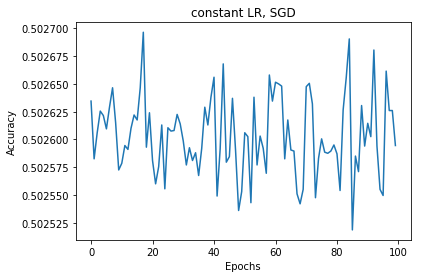

In [22]:
model.compile(optimizer=SGD(0.001), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X, Y, batch_size=2000, epochs=100, verbose=1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("constant LR, SGD")
plt.plot(history.history['acc'])

The following tests callback functionality for each default Keras optimizer.

Tests demonstrate expected cyclical behavior, as well as functionality of resetting the cycles and/or adjusting boundary values.

### SGD

In [13]:
clr_triangular = CyclicLR(mode='triangular')

model.compile(optimizer=SGD(), loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
history = model.fit(X, Y, batch_size=2000, epochs=30, callbacks=[clr_triangular], verbose=1)

Epoch 1/30
2000000/2000000 [==============================] - 2s - loss: 0.6932 - acc: 0.5005     
Epoch 2/30
2000000/2000000 [==============================] - 2s - loss: 0.6931 - acc: 0.5005     
Epoch 3/30
2000000/2000000 [==============================] - 2s - loss: 0.6931 - acc: 0.5005     
Epoch 4/30
2000000/2000000 [==============================] - 2s - loss: 0.6931 - acc: 0.5004     
Epoch 5/30
2000000/2000000 [==============================] - 2s - loss: 0.6931 - acc: 0.5005     
Epoch 6/30
2000000/2000000 [==============================] - 2s - loss: 0.6931 - acc: 0.5006     
Epoch 7/30
2000000/2000000 [==============================] - 2s - loss: 0.6931 - acc: 0.5005     
Epoch 8/30
2000000/2000000 [==============================] - 2s - loss: 0.6931 - acc: 0.5006     
Epoch 9/30
2000000/2000000 [==============================] - 2s - loss: 0.6931 - acc: 0.5007     
Epoch 10/30
2000000/2000000 [==============================] - 2s - loss: 0.6931 - acc: 0.5008     
Epoch 11/

In [ ]:
plt.xlabel('Training Iterations')
plt.ylabel('Learning Rate')
plt.title("CLR - 'triangular' Policy")
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [ ]:
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("CLR - 'triangular' Policy")
plt.plot(history.history['acc'])



In [ ]:
clr_triangular = CyclicLR(mode='triangular2')

model.compile(optimizer=SGD(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(X, Y, batch_size=2000, epochs=20, callbacks=[clr_triangular], verbose=0)

In [ ]:
clr_triangular._reset()

In [ ]:
model.fit(X, Y, batch_size=2000, epochs=10, callbacks=[clr_triangular],verbose=0)

In [ ]:
plt.xlabel('Training Iterations')
plt.ylabel('Learning Rate')
plt.title("'triangular2' Policy Reset at 20000 Iterations")
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [ ]:
clr_triangular = CyclicLR(mode='exp_range', gamma=0.99994)

model.compile(optimizer=SGD(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X, Y, batch_size=2000, nb_epoch=20, callbacks=[clr_triangular], verbose=0)

In [ ]:
plt.xlabel('Training Iterations')
plt.ylabel('Learning Rate')
plt.title("CLR - 'exp_range' Policy")
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])

In [ ]:
clr_triangular._reset(new_base_lr=0.003, new_max_lr=0.009)

In [ ]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular], verbose=0)

In [ ]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])

In [ ]:
clr = lambda x: 0.5*(1+np.sin(x*np.pi/2.))

In [ ]:
clr_triangular = CyclicLR(scale_fn=clr, scale_mode='cycle')

model.compile(optimizer=SGD(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X, Y, batch_size=2000, nb_epoch=40, callbacks=[clr_triangular], verbose=0)

In [ ]:
plt.xlabel('Training Iterations')
plt.ylabel('Learning Rate')
plt.title("CLR - Custom Sinusoidal Cycle-Policy")
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [ ]:
clr = lambda x: 1/(5**(x*0.0001))

In [ ]:
clr_triangular = CyclicLR(scale_fn=clr, scale_mode='iterations')

model.compile(optimizer=SGD(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular],verbose=0)

In [ ]:
plt.xlabel('Training Iterations')
plt.ylabel('Learning Rate')
plt.title("CLR - Custom Iteration-Policy")
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])

### RMSprop

In [ ]:
clr_triangular = CyclicLR(mode='triangular')

model.compile(optimizer=RMSprop(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular],verbose=0)

In [ ]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])

In [ ]:
clr_triangular = CyclicLR(mode='triangular2')

model.compile(optimizer=RMSprop(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X, Y, batch_size=2000, nb_epoch=20, callbacks=[clr_triangular], verbose=0)

In [ ]:
clr_triangular._reset()

In [ ]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular], verbose=0)

In [ ]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])

In [ ]:
clr_triangular = CyclicLR(mode='exp_range', gamma=0.99994)

model.compile(optimizer=RMSprop(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X, Y, batch_size=2000, nb_epoch=20, callbacks=[clr_triangular], verbose=0)

In [ ]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [ ]:
clr_triangular._reset(new_base_lr=0.003, new_max_lr=0.009)

In [ ]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular], verbose=0)

In [ ]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [ ]:
clr = lambda x: 0.5*(1+np.sin(x*np.pi/2.))

In [ ]:
clr_triangular = CyclicLR(scale_fn=clr, scale_mode='cycle')

model.compile(optimizer=RMSprop(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X, Y, batch_size=2000, nb_epoch=40, callbacks=[clr_triangular], verbose=0)

In [ ]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [ ]:
clr = lambda x: 1/(5**(x*0.0001))

In [ ]:
clr_triangular = CyclicLR(scale_fn=clr, scale_mode='iterations')

model.compile(optimizer=RMSprop(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular], verbose=0)

In [ ]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


### Adagrad

In [ ]:
clr_triangular = CyclicLR(mode='triangular')

model.compile(optimizer=Adagrad(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular],verbose=0)

In [ ]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [ ]:
clr_triangular = CyclicLR(mode='triangular2')

model.compile(optimizer=Adagrad(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X, Y, batch_size=2000, nb_epoch=20, callbacks=[clr_triangular], verbose=0)

In [ ]:
clr_triangular._reset()

In [ ]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular], verbose=0)

In [ ]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [ ]:
clr_triangular = CyclicLR(mode='exp_range', gamma=0.99994)

model.compile(optimizer=Adagrad(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X, Y, batch_size=2000, nb_epoch=20, callbacks=[clr_triangular], verbose=0)

In [ ]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [ ]:
clr_triangular._reset(new_base_lr=0.003, new_max_lr=0.009)

In [ ]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular], verbose=0)

In [ ]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [ ]:
clr = lambda x: 0.5*(1+np.sin(x*np.pi/2.))

In [ ]:
clr_triangular = CyclicLR(scale_fn=clr, scale_mode='cycle')

model.compile(optimizer=Adagrad(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X, Y, batch_size=2000, nb_epoch=40, callbacks=[clr_triangular], verbose=0)

In [ ]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [ ]:
clr = lambda x: 1/(5**(x*0.0001))

In [ ]:
clr_triangular = CyclicLR(scale_fn=clr, scale_mode='iterations')

model.compile(optimizer=Adagrad(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular], verbose=0)

In [ ]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


### Adadelta

In [ ]:
clr_triangular = CyclicLR(mode='triangular')

model.compile(optimizer=Adadelta(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular],verbose=0)

In [ ]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [ ]:
clr_triangular = CyclicLR(mode='triangular2')

model.compile(optimizer=Adadelta(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X, Y, batch_size=2000, nb_epoch=20, callbacks=[clr_triangular], verbose=0)

In [ ]:
clr_triangular._reset()

In [ ]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular], verbose=0)

In [ ]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [ ]:
clr_triangular = CyclicLR(mode='exp_range', gamma=0.99994)

model.compile(optimizer=Adadelta(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X, Y, batch_size=2000, nb_epoch=20, callbacks=[clr_triangular], verbose=0)

In [ ]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [ ]:
clr_triangular._reset(new_base_lr=0.003, new_max_lr=0.009)

In [ ]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular], verbose=0)

In [ ]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [ ]:
clr = lambda x: 0.5*(1+np.sin(x*np.pi/2.))

In [ ]:
clr_triangular = CyclicLR(scale_fn=clr, scale_mode='cycle')

model.compile(optimizer=Adadelta(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X, Y, batch_size=2000, nb_epoch=40, callbacks=[clr_triangular], verbose=0)

In [ ]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [ ]:
clr = lambda x: 1/(5**(x*0.0001))

In [ ]:
clr_triangular = CyclicLR(scale_fn=clr, scale_mode='iterations')

model.compile(optimizer=Adadelta(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular], verbose=0)

In [ ]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


### Adam

In [ ]:
clr_triangular = CyclicLR(mode='triangular')

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular],verbose=0)

In [ ]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [ ]:
clr_triangular = CyclicLR(mode='triangular2')

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X, Y, batch_size=2000, nb_epoch=20, callbacks=[clr_triangular], verbose=0)

In [ ]:
clr_triangular._reset()

In [ ]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular], verbose=0)

In [ ]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [ ]:
clr_triangular = CyclicLR(mode='exp_range', gamma=0.99994)

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X, Y, batch_size=2000, nb_epoch=20, callbacks=[clr_triangular], verbose=0)

In [ ]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [ ]:
clr_triangular._reset(new_base_lr=0.003, new_max_lr=0.009)

In [ ]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular], verbose=0)

In [ ]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [ ]:
clr = lambda x: 0.5*(1+np.sin(x*np.pi/2.))

In [ ]:
clr_triangular = CyclicLR(scale_fn=clr, scale_mode='cycle')

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X, Y, batch_size=2000, nb_epoch=40, callbacks=[clr_triangular], verbose=0)

In [ ]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [ ]:
clr = lambda x: 1/(5**(x*0.0001))

In [ ]:
clr_triangular = CyclicLR(scale_fn=clr, scale_mode='iterations')

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular], verbose=0)

In [ ]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


### Adamax

In [ ]:
clr_triangular = CyclicLR(mode='triangular')

model.compile(optimizer=Adamax(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular],verbose=0)

In [ ]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [ ]:
clr_triangular = CyclicLR(mode='triangular2')

model.compile(optimizer=Adamax(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X, Y, batch_size=2000, nb_epoch=20, callbacks=[clr_triangular], verbose=0)

In [ ]:
clr_triangular._reset()

In [ ]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular], verbose=0)

In [ ]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [ ]:
clr_triangular = CyclicLR(mode='exp_range', gamma=0.99994)

model.compile(optimizer=Adamax(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X, Y, batch_size=2000, nb_epoch=20, callbacks=[clr_triangular], verbose=0)

In [ ]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [ ]:
clr_triangular._reset(new_base_lr=0.003, new_max_lr=0.009)

In [ ]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular], verbose=0)

In [ ]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [ ]:
clr = lambda x: 0.5*(1+np.sin(x*np.pi/2.))

In [ ]:
clr_triangular = CyclicLR(scale_fn=clr, scale_mode='cycle')

model.compile(optimizer=Adamax(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X, Y, batch_size=2000, nb_epoch=40, callbacks=[clr_triangular], verbose=0)

In [ ]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [ ]:
clr = lambda x: 1/(5**(x*0.0001))

In [ ]:
clr_triangular = CyclicLR(scale_fn=clr, scale_mode='iterations')

model.compile(optimizer=Adamax(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular], verbose=0)

In [ ]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


### Nadam

In [ ]:
clr_triangular = CyclicLR(mode='triangular')

model.compile(optimizer=Nadam(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular],verbose=0)

In [ ]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [ ]:
clr_triangular = CyclicLR(mode='triangular2')

model.compile(optimizer=Nadam(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X, Y, batch_size=2000, nb_epoch=20, callbacks=[clr_triangular], verbose=0)

In [ ]:
clr_triangular._reset()

In [ ]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular], verbose=0)

In [ ]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [ ]:
clr_triangular = CyclicLR(mode='exp_range', gamma=0.99994)

model.compile(optimizer=Nadam(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X, Y, batch_size=2000, nb_epoch=20, callbacks=[clr_triangular], verbose=0)

In [ ]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [ ]:
clr_triangular._reset(new_base_lr=0.003, new_max_lr=0.009)

In [ ]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular], verbose=0)

In [ ]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [ ]:
clr = lambda x: 0.5*(1+np.sin(x*np.pi/2.))

In [ ]:
clr_triangular = CyclicLR(scale_fn=clr, scale_mode='cycle')

model.compile(optimizer=Nadam(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X, Y, batch_size=2000, nb_epoch=40, callbacks=[clr_triangular], verbose=0)

In [ ]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [ ]:
clr = lambda x: 1/(5**(x*0.0001))

In [ ]:
clr_triangular = CyclicLR(scale_fn=clr, scale_mode='iterations')

model.compile(optimizer=Nadam(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular], verbose=0)

In [ ]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])
